<a href="https://colab.research.google.com/github/jeba0909/EDA/blob/main/21BDS0320_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 3**

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


In [26]:
# Load Data
data = pd.read_csv('PPGE.csv')

In [27]:
# Display the first few rows and available columns
print(data.head())
print("Available columns:", data.columns)

   rownames    country iso3c  year  govtspendgdp   tradegdp    kaopen  \
0         1  Australia   AUS  1970     25.316267  26.153638 -0.159932   
1         2  Australia   AUS  1971     26.051857  25.554840 -0.159932   
2         3  Australia   AUS  1972     27.023659  24.757565 -0.159932   
3         4  Australia   AUS  1973     26.591579  25.131972 -0.159932   
4         5  Australia   AUS  1974     30.912184  26.322852 -0.159932   

   ka_open  v2catrauni  v2catrauni_ord  
0    0.417       2.265               4  
1    0.417       2.265               4  
2    0.417       2.265               4  
3    0.417       2.265               4  
4    0.417       2.265               4  
Available columns: Index(['rownames', 'country', 'iso3c', 'year', 'govtspendgdp', 'tradegdp',
       'kaopen', 'ka_open', 'v2catrauni', 'v2catrauni_ord'],
      dtype='object')


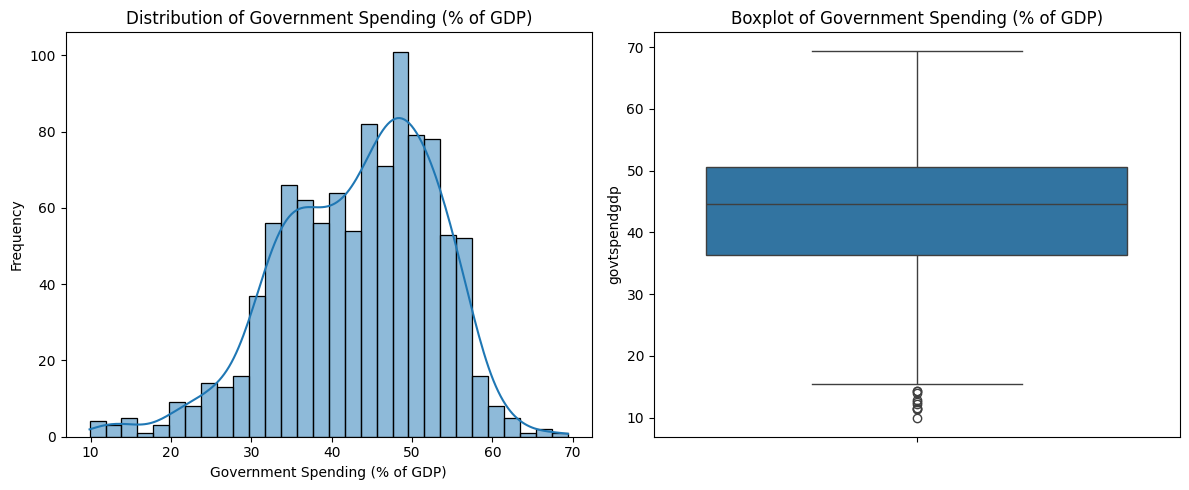

In [29]:
# Step 1: Univariate Analysis
plt.figure(figsize=(12, 5))

# Histogram for 'govtspendgdp'
plt.subplot(1, 2, 1)
sns.histplot(data['govtspendgdp'], bins=30, kde=True)
plt.title('Distribution of Government Spending (% of GDP)')
plt.xlabel('Government Spending (% of GDP)')
plt.ylabel('Frequency')

# Boxplot for 'govtspendgdp'
plt.subplot(1, 2, 2)
sns.boxplot(y=data['govtspendgdp'])
plt.title('Boxplot of Government Spending (% of GDP)')

plt.tight_layout()
plt.show()

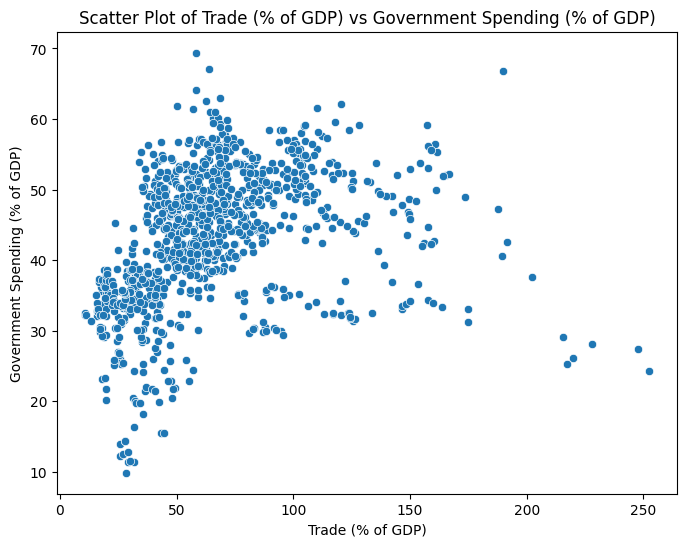

Correlation between Trade and Government Spending: 0.32


In [30]:
# Step 2: Bivariate Analysis
# Scatter Plot between 'govtspendgdp' and another numeric column (replace 'tradegdp' with your actual column name)
if 'tradegdp' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data['tradegdp'], y=data['govtspendgdp'])
    plt.title('Scatter Plot of Trade (% of GDP) vs Government Spending (% of GDP)')
    plt.xlabel('Trade (% of GDP)')
    plt.ylabel('Government Spending (% of GDP)')
    plt.show()

    # Calculate and print correlation coefficient
    correlation = data['tradegdp'].corr(data['govtspendgdp'])
    print(f'Correlation between Trade and Government Spending: {correlation:.2f}')
else:
    print("'tradegdp' column not found in data.")

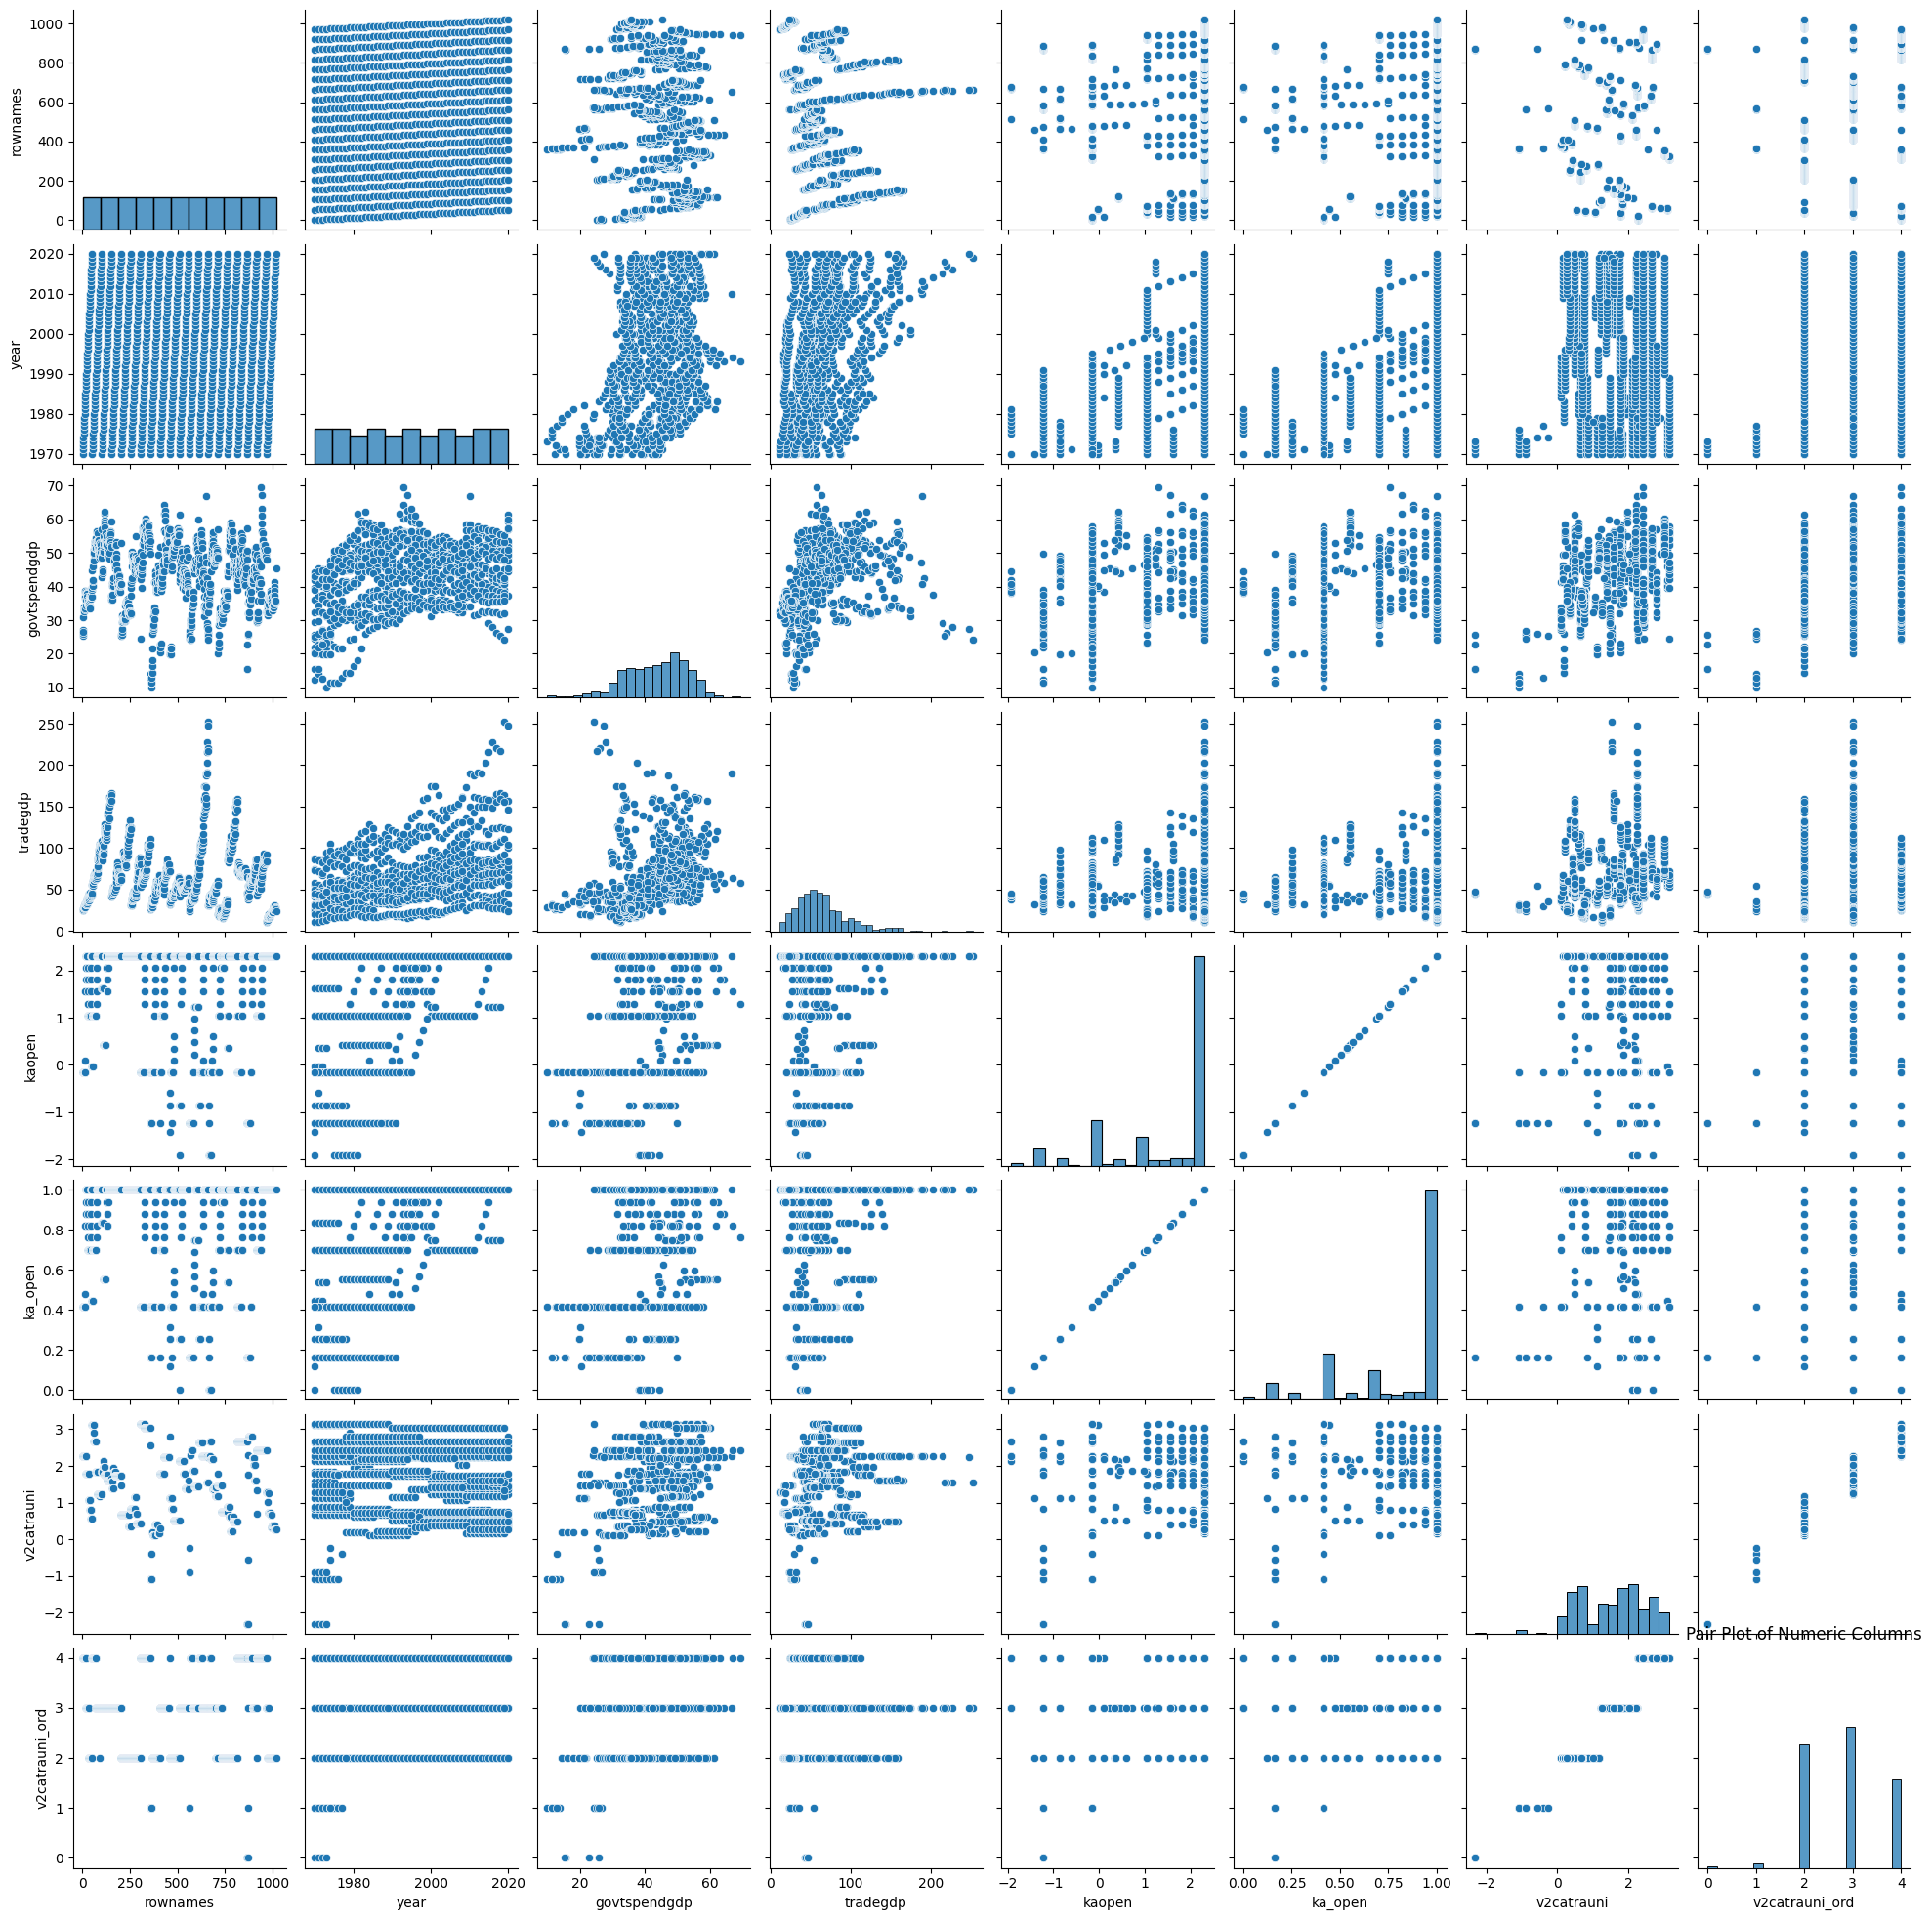

In [31]:
# Step 3: Multivariate Analysis
# Pair Plot for all numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
sns.pairplot(data[numeric_cols])
plt.title('Pair Plot of Numeric Columns')
plt.show()

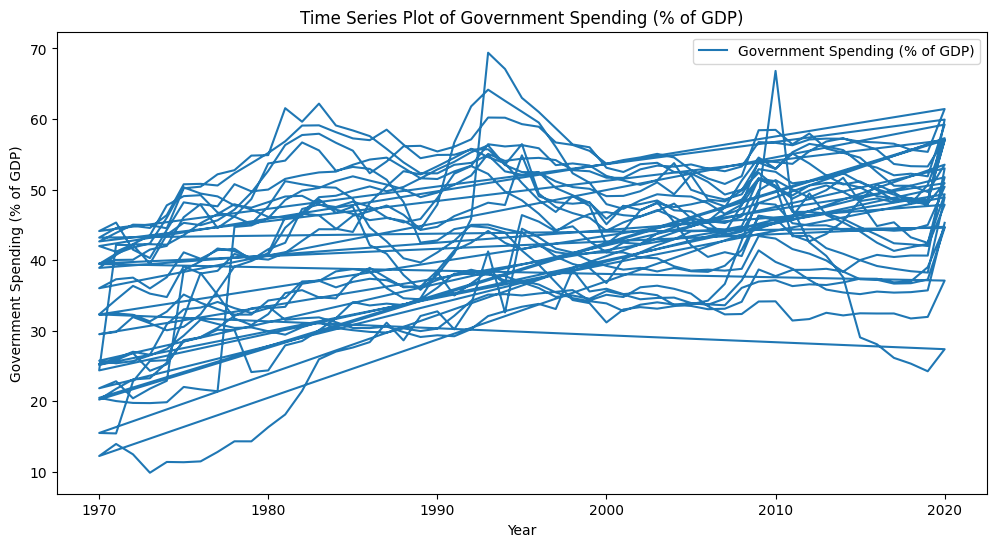

<ipython-input-32-5ec4a5b75c58>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['govtspendgdp'].resample('M').mean()


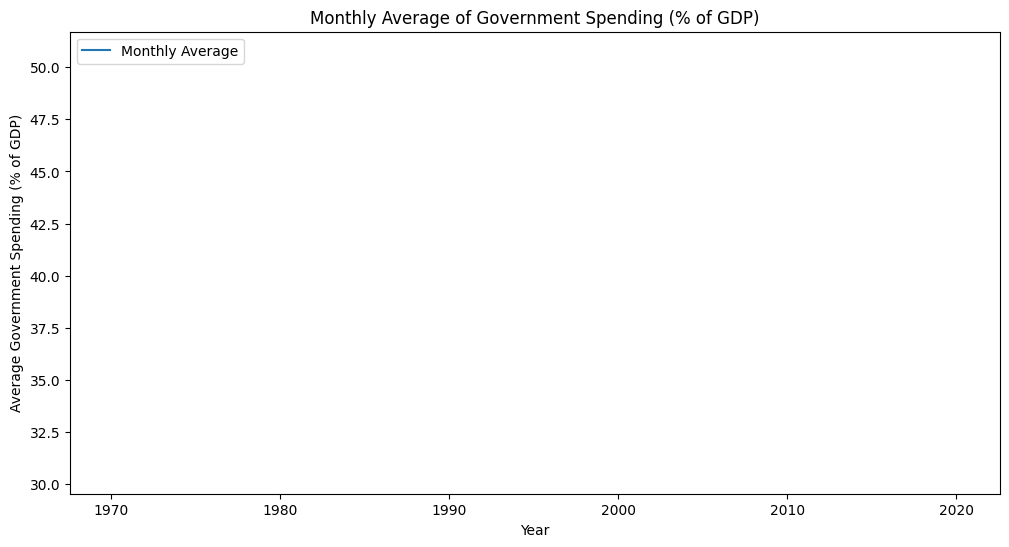

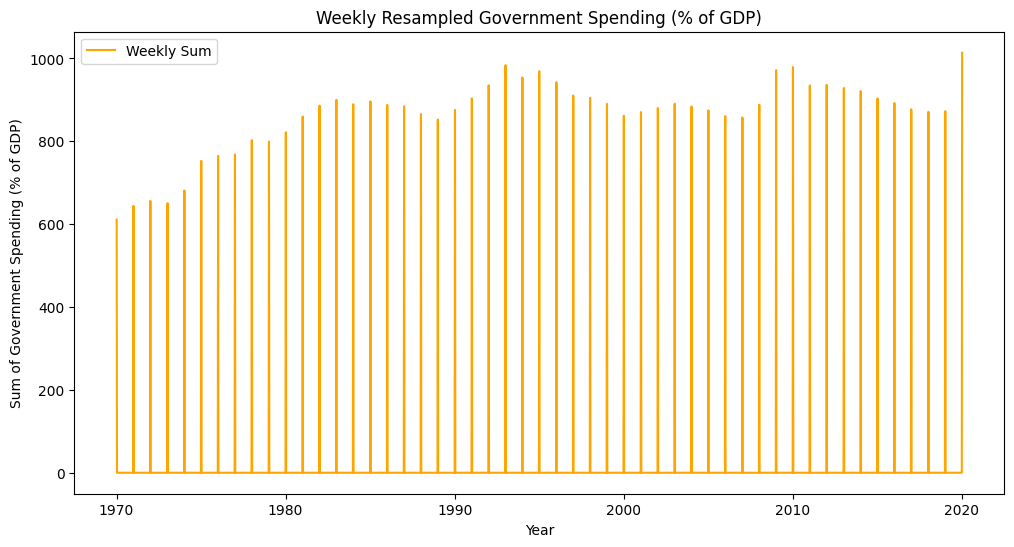

In [32]:
# Step 4: Time Series Analysis (TSA)
# Ensure your date column is in datetime format (replace 'year' with your actual date column if necessary)
if 'year' in data.columns:
    data['year'] = pd.to_datetime(data['year'], format='%Y')  # Assuming 'year' is your time column
    data.set_index('year', inplace=True)

    # Time Series Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['govtspendgdp'], label='Government Spending (% of GDP)')
    plt.title('Time Series Plot of Government Spending (% of GDP)')
    plt.xlabel('Year')
    plt.ylabel('Government Spending (% of GDP)')
    plt.legend()
    plt.show()

    # Step 5: Grouping Time Series Data
    monthly_data = data['govtspendgdp'].resample('M').mean()
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_data.index, monthly_data, label='Monthly Average')
    plt.title('Monthly Average of Government Spending (% of GDP)')
    plt.xlabel('Year')
    plt.ylabel('Average Government Spending (% of GDP)')
    plt.legend()
    plt.show()

    # Resampling Time Series Data
    weekly_data = data['govtspendgdp'].resample('W').sum()
    plt.figure(figsize=(12, 6))
    plt.plot(weekly_data.index, weekly_data, label='Weekly Sum', color='orange')
    plt.title('Weekly Resampled Government Spending (% of GDP)')
    plt.xlabel('Year')
    plt.ylabel('Sum of Government Spending (% of GDP)')
    plt.legend()
    plt.show()
else:
    print("'year' column not found in data.")

Cleaned data shape: (988, 10)
Mean Squared Error (MSE): 69.91927916894701
Mean Absolute Error (MAE): 6.515421103004799
R-squared (R²): 0.21773319720944517
Cross-Validation R² Scores: [ 0.08120157  0.36996218  0.07539626 -0.70539284  0.39690392]
Mean Cross-Validation R²: 0.04361421879642178


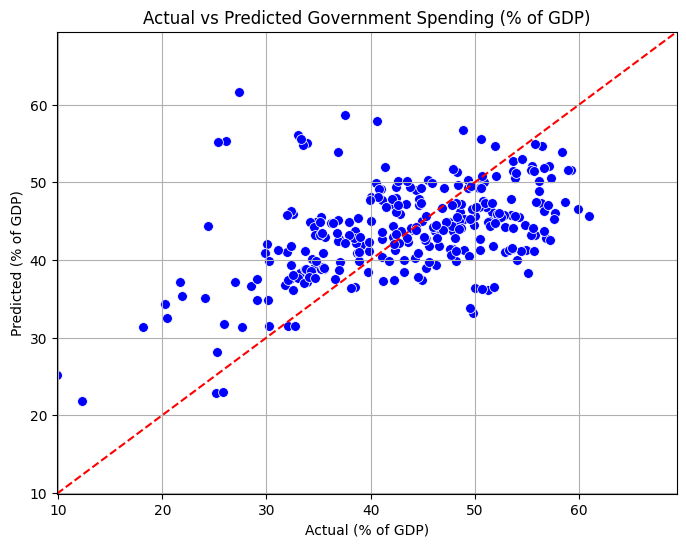

In [28]:
# Step 6: Check for column names
required_columns = ['govtspendgdp', 'year']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print("Missing columns:", missing_columns)
else:
    # Linear Regression Model
    # Identify numeric columns
    numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

    # Ensure 'govtspendgdp' is present
    if 'govtspendgdp' in data.columns:
        numeric_cols = [col for col in numeric_cols if col != 'govtspendgdp']  # Remove target from features

        # Drop rows with NaN in features and target
        data_cleaned = data.dropna(subset=numeric_cols + ['govtspendgdp'])

        # Check cleaned data
        print("Cleaned data shape:", data_cleaned.shape)

        # Define features (X) and target (y)
        X = data_cleaned[numeric_cols]  # Exclude target from features
        y = data_cleaned['govtspendgdp']

        # Standardize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

        # Linear Regression Model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluation Metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print("Mean Squared Error (MSE):", mse)
        print("Mean Absolute Error (MAE):", mae)
        print("R-squared (R²):", r2)

        # Cross-validation
        cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
        print("Cross-Validation R² Scores:", cv_scores)
        print("Mean Cross-Validation R²:", cv_scores.mean())

        # Visualization: Actual vs Predicted
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_test, y=y_pred, color="blue", s=50)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")  # Line for perfect predictions
        plt.title("Actual vs Predicted Government Spending (% of GDP)")
        plt.xlabel("Actual (% of GDP)")
        plt.ylabel("Predicted (% of GDP)")
        plt.xlim([y.min(), y.max()])  # Set x limits to the range of y values
        plt.ylim([y.min(), y.max()])  # Set y limits to the range of y values
        plt.grid(True)
        plt.show()
    else:
        print("'govtspendgdp' column not found in data.")